#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: 

- Member 1: Syeda Laiba Faraz 
- Member 2: Faiq Ahmed Shaikh
- Member 3: Ma Bowen 

#### Import libraries

In [2]:
%config Completer.use_jedi=False # comment if not needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

#### Load the dataset

In [3]:
#Reads csv file and replaces ? with NaN
df = pd.read_csv("risk_factors.csv", na_values="?")

### Understanding Data
______________________________________________________________________________________
Description:
This dataset has 858 entries and 36 columns, out of which 2 were dropped later due to a high percentage of null values, and if these were to be imputed it would greatly affect the perfomance of the models. Other columns with null values were imputed using the median of the given value.

A bar chart was plotted to visualise the percentage of Null values in the entire dataset. A histogram was also produced to observe the value distribution of the target "biopsy". Which revealed imbalance heavily skewing towards "0" class.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-null  

In [31]:
# Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


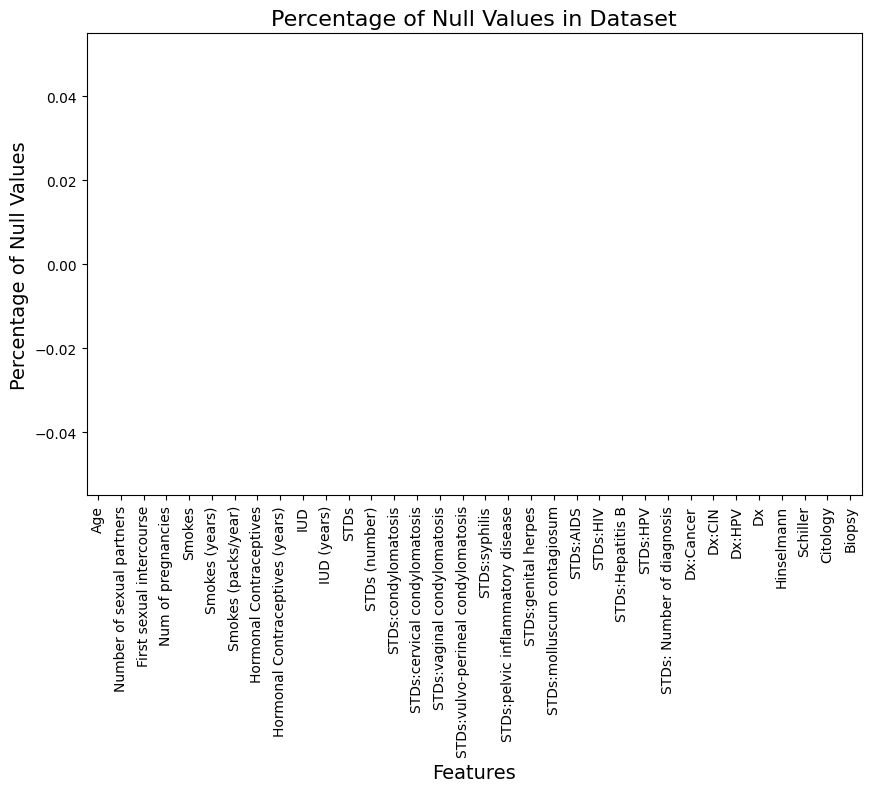

In [32]:
# Creating bar plot to Visualise the percentage of null values in dataset
null_percentages = (df.isnull().mean() * 100).round(2)

plt.figure(figsize=(10, 6))
null_percentages.plot(kind='bar', color='green')

plt.title('Percentage of Null Values in Dataset', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage of Null Values', fontsize=14)

plt.show()


##### Features 26 and 27 ("STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" as shown in df.info) will be dropped because they have too many nulls.

In [33]:
df.shape

(835, 34)

In [8]:
print(df.columns[26], df.columns[27])
# Drop columns (26 and 27)
df = df.drop(df.columns[[26, 27]], axis=1)

STDs: Time since first diagnosis STDs: Time since last diagnosis


In [9]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [10]:
df.duplicated().sum() # this prints the True/False to mark the duplicate rows 
#returns a boolean Series indicating whether each row is a duplicate of a previous row

23

In [11]:
df[df.duplicated] #returns only the duplicate rows

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
66,34,3.0,19.0,3.0,0.0,0.0,0.0,1.0,5.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
234,25,NaN,18.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
255,25,2.0,18.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0,0,0,0,0,0,0,0,0
356,18,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
395,18,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
406,17,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
419,19,4.0,14.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
431,18,1.0,14.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
435,17,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
440,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [12]:
df = df.drop_duplicates()

Although different patients might coincidentally have identical values, exact matches are rare and usually suggest data entry duplication. To avoid bias and ensure fair model training, we removed these duplicates while preserving the dataset’s diversity and size.

In [13]:
df.shape

(835, 34)

In [14]:
skewness = df.select_dtypes(include='number').skew()
print(skewness)

Age                                    1.403917
Number of sexual partners              5.481626
First sexual intercourse               1.566655
Num of pregnancies                     1.395841
Smokes                                 1.967999
Smokes (years)                         4.396961
Smokes (packs/year)                    9.181032
Hormonal Contraceptives               -0.637845
Hormonal Contraceptives (years)        2.595193
IUD                                    2.421746
IUD (years)                            4.934714
STDs                                   2.539792
STDs (number)                          3.352185
STDs:condylomatosis                    3.718148
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis           13.472043
STDs:vulvo-perineal condylomatosis     3.770033
STDs:syphilis                          6.165511
STDs:pelvic inflammatory disease      27.110883
STDs:genital herpes                   27.110883
STDs:molluscum contagiosum            27

In [15]:
# Impute null values in features with its median
df = df.fillna(df.median())

In [16]:
df.nunique()

Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV        

In [17]:
for col in df.columns:
    print(f"--- {col} ---")
    print(df[col].unique())
    print()

--- Age ---
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]

--- Number of sexual partners ---
[ 4.  1.  5.  3.  2.  6.  7. 15.  8. 10. 28.  9.]

--- First sexual intercourse ---
[15. 14. 17. 16. 21. 23. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11. 12.
 22. 28. 10.]

--- Num of pregnancies ---
[ 1.  4.  2.  6.  3.  5.  8.  7.  0. 11. 10.]

--- Smokes ---
[0. 1.]

--- Smokes (years) ---
[ 0.         37.         34.          1.26697291  3.         12.
 18.          7.         19.         21.         15.         13.
 16.          8.          4.         10.         22.         14.
  0.5        11.          9.          2.          5.          6.
  1.         32.         24.         28.         20.          0.16      ]

--- Smokes (packs/year) ---
[0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
 9.00000000e+00 1.60000000e+00 1.9000000

In [18]:
# Take Biopsy as the target variable
X = df.iloc[:,:-4].values
y = df.iloc[:,-1].values

In [19]:
df['Biopsy'].value_counts()

Biopsy
0    781
1     54
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of classes in Biopsy')

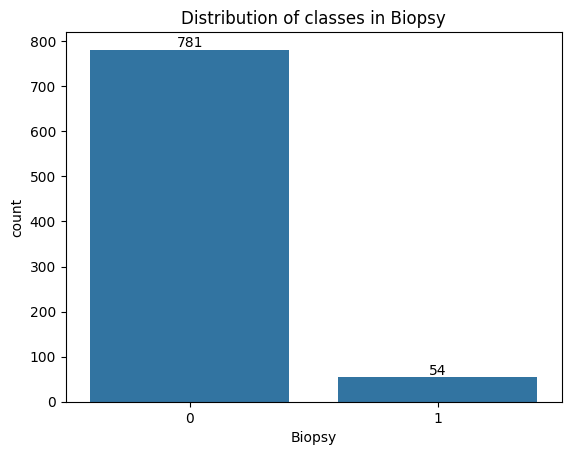

In [20]:
# Plot histogram to show distribution of classes in Biopsy
ax = sns.countplot(x=df["Biopsy"])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution of classes in Biopsy")

Class imbalance in the "Biopsy" target, heavily skewed towards the '0' class. As a result, only 6.41% of the patients reported positive for "Biopsy" and this bias would affect the decisions made when constructing the models.


Correlation Matrix of Target Variables:


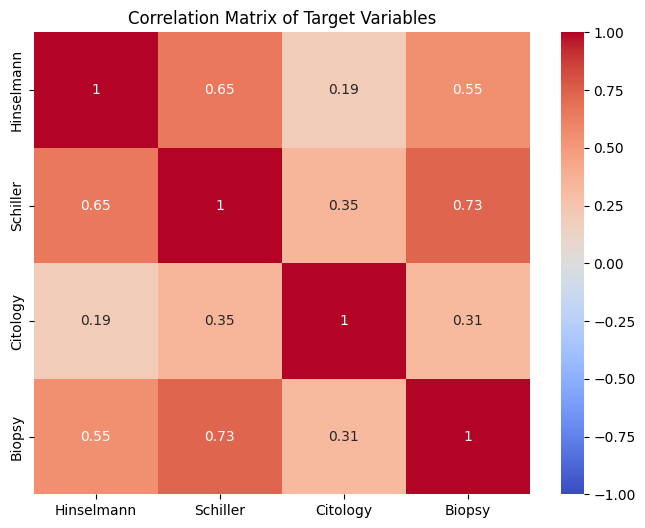

In [21]:
# Correlation analysis of target variables
print("\nCorrelation Matrix of Target Variables:")
target_vars = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
corr_matrix = df[target_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Target Variables')
plt.show()

The correlation matrix examines relationships between the four target variables. Low to moderate correlations support binary classification for Biopsy, as each test provides distinct diagnostic information. Multi-class classification is impractical due to class imbalance (6.41% positive class for Biopsy) and clinical practice of interpreting tests separately.

#### Split the dataset
Split the dataset into training, validation and test sets.

In [22]:
X = df.drop('Biopsy', axis=1)  
y = df['Biopsy']

In [23]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42, stratify=y)

# train (75%) and validation (25%) (e.g., 75% train, 25% val of the 80%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25, random_state=42, stratify=y_train)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

Feature Scaling was performed to ensure that all features were on the same scale. Although Decision Tree and Random Forest models are not sensitive to feature scaling, normalization was applied to maintain consistency. In other algorithms, unscaled features can lead to issues such as slower convergence during gradient descent.

Label encoding was not required, as all features in the dataset were numerical and there were no categorical variables.


In [24]:
# Perform standardisation
scaler = StandardScaler()
scaler.fit(X_train)
# Transform the input features with the fitted scaler
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description: 

For feature selection, we used the Chi-squared statistical test to identify the top features most relevant to the target variable.  This test evaluates the independence between each feature and the target variable.

In [25]:
# Chi-squared feature selection
feature_selector = SelectKBest(chi2, k=10)
feature_selector.fit(X, y)

# Chi-squared scores of selected features
chi2_scores = feature_selector.scores_[feature_selector.get_support()]

# Mask feature names according to selected features.
selected_features = feature_selector.get_feature_names_out()

# Sort the feature in descending order
sorted_indices = np.argsort(chi2_scores)[::-1]
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_scores = chi2_scores[sorted_indices]

# Print the list of features and scores
max_feature_width = max(len(feature) for feature in sorted_features)
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature.ljust(max_feature_width)}, chi2_score = {score:.4f}")

Schiller                       , chi2_score = 404.8140
Hinselmann                     , chi2_score = 244.1790
Citology                       , chi2_score = 77.7334
Hormonal Contraceptives (years), chi2_score = 46.8193
Smokes (years)                 , chi2_score = 42.7300
Dx:HPV                         , chi2_score = 21.4791
Dx:Cancer                      , chi2_score = 21.4791
Dx                             , chi2_score = 20.4445
STDs (number)                  , chi2_score = 16.1508
STDs:genital herpes            , chi2_score = 14.4630


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description: Two predictive models were developed for Biopsy (binary: 0 or 1), meeting the requirement for two models, one being a Decision Tree or SVM: a Decision Tree and a Random Forest.

Model development followed an iterative approach. First, we trained the models on the training set and then validated on the validation set to fine tune the hyperparameters.

Because of the class imbalance on the "Biopsy" target Variable, it wasn't feasible to focus solely on the "accuracy" of the models, doing so would lead to incorrect high scores because most of the predictions would be of the majority class ("0"). Instead, we used  the F1-score, which provides a more balanced evaluation by equally considering precision and recall for each class.

The first model trained is Random Forest

The second model trained is decision tree(DT). There are many parameters that can be tuned to affect the splitting of the decision tree. 

### Random Forest

In [26]:
# Baseline Random Forest with default parameters
print("Training Baseline Random Forest (Default Parameters)...")
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
baseline_pred = rf_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

Training Baseline Random Forest (Default Parameters)...


In [27]:
# Random Forest with Grid Search
print("\nTraining Random Forest with Grid Search...")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)


Training Random Forest with Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [34]:
print("Best parameters from Grid Search:", grid_search.best_params_)
rf_grid_best = grid_search.best_estimator_

Best parameters from Grid Search: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
# Random Forest with Random Search
print("\nTraining Random Forest with Random Search...")
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 16),
    'min_samples_leaf': randint(1, 7),
    'class_weight': ['balanced']
}
rf_random = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_random, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='f1', verbose=1, random_state=42)
random_search.fit(X_train, y_train)


Training Random Forest with Random Search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000131178855B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001311639EF70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001311788E0D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013116338D60>},
                   random_state=42, scoring='f1', verbose=1)

In [37]:
print("Best parameters from Random Search:", random_search.best_params_)
rf_random_best = random_search.best_estimator_

Best parameters from Random Search: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 78}


## Decision Tree

#### Baseline Model

In [38]:
# Baseline Model - Validation Set
base_clf = DecisionTreeClassifier()
base_clf.fit(X_train,y_train)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
# Test the model with the testing data set and prints Accuracy Score
pred_base = base_clf.predict(X_valid)
base_acc = accuracy_score(y_valid, pred_base)
print("Baseline Accuracy:", base_acc)

Baseline Accuracy: 0.9341317365269461


In [39]:
# Baseline Model - Test Set
base_clf = DecisionTreeClassifier()
base_clf.fit(X_train,y_train)

# Test the model with the testing data set and prints Accuracy Score
pred_base = base_clf.predict(X_test)
base_acc = accuracy_score(y_test, pred_base)
print("Baseline Accuracy:", base_acc)

Baseline Accuracy: 0.9520958083832335


In [40]:
default = DecisionTreeClassifier()
default.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

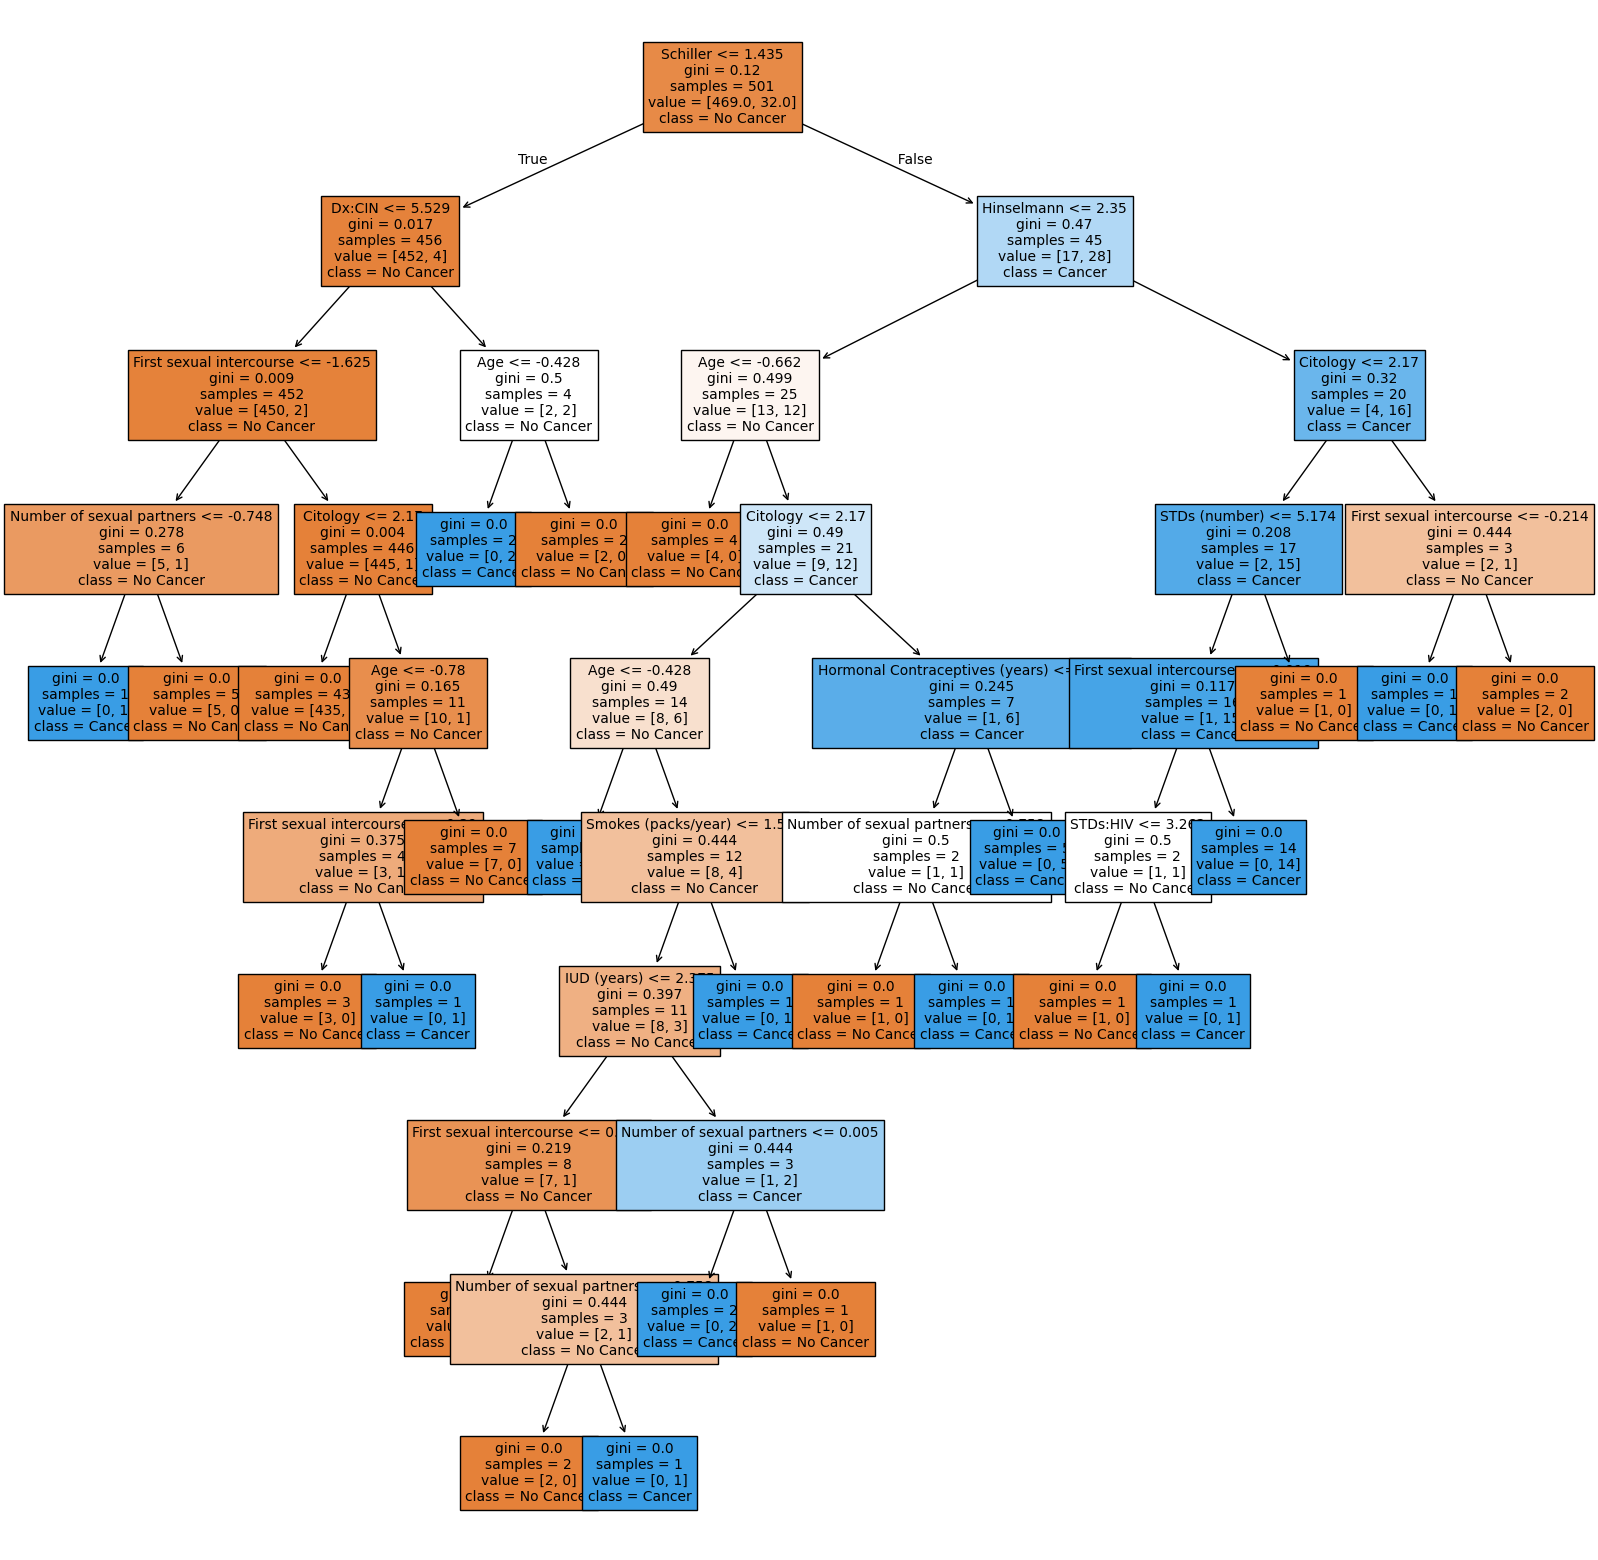

In [41]:
# Default Parameters Tree
from sklearn import preprocessing, tree
fig = plt.figure(figsize=(20,20))
_= tree.plot_tree(base_clf, feature_names=X.columns, class_names = {0: 'No Cancer', 1: 'Cancer'}, filled =True, fontsize=10)

#### Important Features

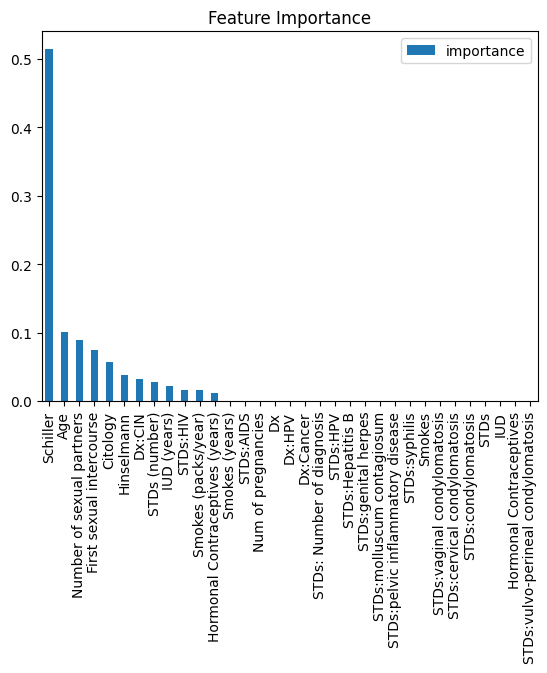

In [42]:
# Bar Chart showing the most important to the least important feature in order

feature_importance = pd.DataFrame(base_clf.feature_importances_, index=X.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [43]:
# Set a threshold for importance
threshold = 0.05  # Keep features with >5% importance

selected_features = feature_importance[feature_importance['importance'] > threshold].index.tolist()
print("Selected important features:", selected_features)

X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]
X_test_selected = X_test[selected_features]

clf_selected = DecisionTreeClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)

y_pred_valid = clf_selected.predict(X_valid_selected)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred_valid))

Selected important features: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Schiller', 'Citology']
Validation Accuracy: 0.9461077844311377


In [44]:
y_pred = clf_selected.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9640718562874252


#### Gini Vs Entropy

In [45]:
# Train Decision Tree with Gini 
dtree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dtree_gini.fit(X_train, y_train)
y_pred_gini = dtree_gini.predict(X_test)

# Train Decision Tree with Entropy
dtree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree_entropy.fit(X_train, y_train)
y_pred_entropy = dtree_entropy.predict(X_test)

#  both models
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, average='weighted')
f1_gini = f1_score(y_test, y_pred_gini, average='weighted')

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')
f1_entropy = f1_score(y_test, y_pred_entropy, average='weighted')

# Print scores
print("Gini - Accuracy:", accuracy_gini)
print("Gini - Precision:", precision_gini)
print("Gini - F1 Score:", f1_gini)

print("\nEntropy - Accuracy:", accuracy_entropy)
print("Entropy - Precision:", precision_entropy)
print("Entropy - F1 Score:", f1_entropy)

# Compare models
better_model = []

if accuracy_gini > accuracy_entropy:
    better_model.append("accuracy (Gini)")
elif accuracy_entropy > accuracy_gini:
    better_model.append("accuracy (Entropy)")

if precision_gini > precision_entropy:
    better_model.append("precision (Gini)")
elif precision_entropy > precision_gini:
    better_model.append("precision (Entropy)")

if f1_gini > f1_entropy:
    better_model.append("f1-score (Gini)")
elif f1_entropy > f1_gini:
    better_model.append("f1-score (Entropy)")

print("\n better model:")
for metric in better_model:
    print(f"- Better in {metric}")

gini_better = sum('Gini' in m for m in better_model)
entropy_better = sum('Entropy' in m for m in better_model)

print("\nOverall better model:")
if gini_better > entropy_better:
    print("Decision tree with Gini impurity performs better overall.")
elif entropy_better > gini_better:
    print("Decision tree with Entropy performs better overall.")
else:
    print("Both models perform equally well.")


Gini - Accuracy: 0.9401197604790419
Gini - Precision: 0.9352518591508966
Gini - F1 Score: 0.9373164499027423

Entropy - Accuracy: 0.9461077844311377
Entropy - Precision: 0.9439032762500477
Entropy - F1 Score: 0.9449107262426311

 better model:
- Better in accuracy (Entropy)
- Better in precision (Entropy)
- Better in f1-score (Entropy)

Overall better model:
Decision tree with Entropy performs better overall.


#### GridSearchCV

In [46]:
# Find optimal parameters for decision tree using GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, learning_curve

param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' :['entropy','gini'],
   # 'splitter':['best','random']
}
grid_search1 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [47]:
best_model1 = grid_search1.best_estimator_
y_pred = best_model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search1.best_params_)
print("Test Accuracy:",accuracy)
#print(classification_report(y_test_20, y_pred))

# Additional metrics
CV1_precision = precision_score(y_test, y_pred, average="weighted")
CV1_recall = recall_score(y_test, y_pred, average="weighted")
CV1_f1 = f1_score(y_test, y_pred, average="weighted")

print("Precision:", CV1_precision)
print("Recall:",CV1_recall)
print("F1 Score:", CV1_f1) 

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9520958083832335
Precision: 0.9461505560307956
Recall: 0.9520958083832335
F1 Score: 0.9470763115119971


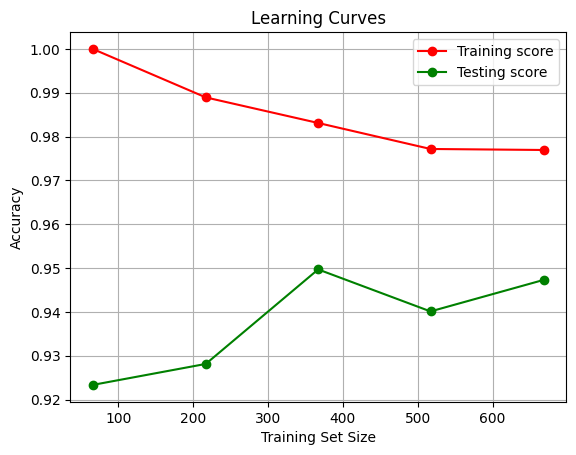

In [48]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model1, X, y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Testing score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

In [49]:
y_pred_baseline = rf_baseline.predict(X_test)
print("\nBaseline - Classification Report:")
print(classification_report(y_test, y_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))


Baseline - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.75      0.55      0.63        11

    accuracy                           0.96       167
   macro avg       0.86      0.77      0.80       167
weighted avg       0.95      0.96      0.95       167

Confusion Matrix:
 [[154   2]
 [  5   6]]


In [50]:
# Predictions and evaluations for Grid Search
y_pred_grid = rf_grid_best.predict(X_test)
print("\n📊 Grid Search - Classification Report:")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))


📊 Grid Search - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.71      0.91      0.80        11

    accuracy                           0.97       167
   macro avg       0.85      0.94      0.89       167
weighted avg       0.98      0.97      0.97       167

Confusion Matrix:
 [[152   4]
 [  1  10]]


In [51]:
# Predictions and evaluations for Random Search
y_pred_random = rf_random_best.predict(X_test)
print("\n📊 Random Search - Classification Report:")
print(classification_report(y_test, y_pred_random))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))


📊 Random Search - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.71      0.91      0.80        11

    accuracy                           0.97       167
   macro avg       0.85      0.94      0.89       167
weighted avg       0.98      0.97      0.97       167

Confusion Matrix:
 [[152   4]
 [  1  10]]


### Decision Tree

In [52]:
# Test the model with the testing data set and prints Accuracy Score
pred_base = base_clf.predict(X_test)
base_acc = accuracy_score(y_test, pred_base)
print("Baseline Accuracy :", base_acc)
print("\nClassification Report:\n", classification_report(y_test, pred_base))
# Confusion matrix Base
confusion_base = confusion_matrix(y_test, pred_base)
print('Confusion matrix:')
print(confusion_base) 

Baseline Accuracy : 0.9520958083832335

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       156
           1       0.71      0.45      0.56        11

    accuracy                           0.95       167
   macro avg       0.84      0.72      0.77       167
weighted avg       0.95      0.95      0.95       167

Confusion matrix:
[[154   2]
 [  6   5]]


In [53]:
#Feature Importance - Selected features - Validation set

y_pred_valid = clf_selected.predict(X_valid_selected)
print("Selected Features- Validation Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_valid))

# Confusion matrix Selected
confusion_selected_V = confusion_matrix(y_test, y_pred_valid)
print('Confusion matrix:')
print(confusion_selected_V)

Selected Features- Validation Accuracy: 0.9461077844311377

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.60      0.55      0.57        11

    accuracy                           0.95       167
   macro avg       0.78      0.76      0.77       167
weighted avg       0.94      0.95      0.94       167

Confusion matrix:
[[147   9]
 [ 10   1]]


In [54]:
# Feature Importance - Selected Features - Test Set

y_pred = clf_selected.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix Selected
confusion_selected = confusion_matrix(y_test, pred_base)
print('Confusion matrix:')
print(confusion_selected)

Accuracy: 0.9640718562874252

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       156
           1       0.73      0.73      0.73        11

    accuracy                           0.96       167
   macro avg       0.85      0.85      0.85       167
weighted avg       0.96      0.96      0.96       167

Confusion matrix:
[[154   2]
 [  6   5]]


In [55]:
# Gini Vs Entropy 

print("\nClassification Report for Gini:")
print(classification_report(y_test, y_pred_gini))

# Confusion matrix Gini
confusion_gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix:')
print(confusion_gini)
print("---------------------------------------------------------")

print("\nClassification Report for Entropy:")
print(classification_report(y_test, y_pred_entropy))

# Confusion matrix Entropy
confusion_En = confusion_matrix(y_test, y_pred_entropy)
print('Confusion matrix:')
print(confusion_En)


Classification Report for Gini:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.56      0.45      0.50        11

    accuracy                           0.94       167
   macro avg       0.76      0.71      0.73       167
weighted avg       0.94      0.94      0.94       167

Confusion matrix:
[[152   4]
 [  6   5]]
---------------------------------------------------------

Classification Report for Entropy:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.60      0.55      0.57        11

    accuracy                           0.95       167
   macro avg       0.78      0.76      0.77       167
weighted avg       0.94      0.95      0.94       167

Confusion matrix:
[[152   4]
 [  5   6]]


In [56]:
# GridSearchCV

# Classification report
print("\nClassification Report - GridSearchCV:")
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion_Grid = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion_Grid)



Classification Report - GridSearchCV:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       156
           1       0.73      0.73      0.73        11

    accuracy                           0.96       167
   macro avg       0.85      0.85      0.85       167
weighted avg       0.96      0.96      0.96       167

Confusion matrix:
[[153   3]
 [  3   8]]
